## Analyze Sentiment in Movie Reviews
The primary aim of this project is to analyze sentiment in movie reviews using Natural Language Processing (NLP) techniques. Additionally, we will apply K-Means clustering to segment customers based on their purchase behavior.

## Data Loading

In [8]:
import pandas as pd

# Load datasets with the correct delimiter
train_data = pd.read_csv(r"C:\Users\youse\Desktop\CodeClause\sentiment-analysis-on-movie-reviews\train.tsv\train.tsv", delimiter='\t')
test_data = pd.read_csv(r"C:\Users\youse\Desktop\CodeClause\sentiment-analysis-on-movie-reviews\test.tsv\test.tsv", delimiter='\t')

# Display the first few rows of the datasets
print(train_data.head())
print(test_data.head())


   PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2  
   PhraseId  SentenceId                                             Phrase
0    156061        8545  An intermittently pleasing but mostly routine ...
1    156062        8545  An intermittently pleasing but mostly routine ...
2    156063        8545                                                 An
3    156064        8545  intermittently pleasing but mostly routine effort
4    156065        8545         intermittently pleasing but mostly

In [11]:
# Display the columns of the datasets
print(train_data.columns)
print(test_data.columns)

Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'], dtype='object')
Index(['PhraseId', 'SentenceId', 'Phrase'], dtype='object')


In [24]:
# Check for null values in train_data
null_train = train_data.isnull().sum()
print("Null values in train_data:")
print(null_train)

# Check for null values in test_data
null_test = test_data.isnull().sum()
print("\nNull values in test_data:")
print(null_test)

# Remove rows with null values in train_data
train_data.dropna(inplace=True)

# Remove rows with null values in test_data
test_data.dropna(inplace=True)


Null values in train_data:
PhraseId          0
SentenceId        0
Phrase            0
Sentiment         0
cleaned_phrase    0
dtype: int64

Null values in test_data:
PhraseId               0
SentenceId             0
Phrase                 0
cleaned_phrase         0
predicted_sentiment    0
dtype: int64


In [26]:
# Check for duplicates in train_data
duplicate_train = train_data.duplicated().sum()
print("\nDuplicates in train_data:", duplicate_train)

# Check for duplicates in test_data
duplicate_test = test_data.duplicated().sum()
print("Duplicates in test_data:", duplicate_test)



Duplicates in train_data: 0
Duplicates in test_data: 0


##  Text Preprocessing

In [27]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Define preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        # Lowercase conversion
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Tokenization
        tokens = word_tokenize(text)
        # Remove stopwords
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        return ' '.join(tokens)
    else:
        return ''

# Load datasets
train_data = pd.read_csv(r"C:\Users\youse\Desktop\CodeClause\sentiment-analysis-on-movie-reviews\train.tsv\train.tsv", delimiter='\t')
test_data = pd.read_csv(r"C:\Users\youse\Desktop\CodeClause\sentiment-analysis-on-movie-reviews\test.tsv\test.tsv", delimiter='\t')

# Apply preprocessing to the 'Phrase' column
train_data['cleaned_phrase'] = train_data['Phrase'].apply(preprocess_text)
test_data['cleaned_phrase'] = test_data['Phrase'].apply(preprocess_text)

# Display the first few rows of the datasets
print(train_data.head())
print(test_data.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\youse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\youse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\youse\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


   PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment                                     cleaned_phrase  
0          1  series escapade demonstrating adage good goose...  
1          2     series escapade demonstrating adage good goose  
2          2                                             series  
3          2                                                     
4          2                                             series  
   PhraseId  SentenceId                                             Phrase  \
0    156061        8545  An intermittently pleasing but m

##  Sentiment Analysis Model

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data['cleaned_phrase'])
y_train = train_data['Sentiment']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_val)
print('Accuracy:', accuracy_score(y_val, y_pred))
print('Precision:', precision_score(y_val, y_pred, average='weighted'))
print('Recall:', recall_score(y_val, y_pred, average='weighted'))
print('F1-Score:', f1_score(y_val, y_pred, average='weighted'))
print('Confusion Matrix:', confusion_matrix(y_val, y_pred))


Accuracy: 0.6179354094579008
Precision: 0.6005756264060833
Recall: 0.6179354094579008
F1-Score: 0.5885278496121381
Confusion Matrix: [[  275   679   409    47     6]
 [  148  1869  3182   316    12]
 [   43   830 13656  1062    48]
 [    6   196  3228  3007   270]
 [    1    31   341  1070   480]]


c:\Users\youse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Evaluation

In [29]:
# Vectorize the test data and predict
X_test = vectorizer.transform(test_data['cleaned_phrase'])
test_data['predicted_sentiment'] = model.predict(X_test)

# Save the results
test_data.to_csv('predicted_test_data.csv', index=False)
print(test_data.head())


   PhraseId  SentenceId                                             Phrase  \
0    156061        8545  An intermittently pleasing but mostly routine ...   
1    156062        8545  An intermittently pleasing but mostly routine ...   
2    156063        8545                                                 An   
3    156064        8545  intermittently pleasing but mostly routine effort   
4    156065        8545         intermittently pleasing but mostly routine   

                                  cleaned_phrase  predicted_sentiment  
0  intermittently pleasing mostly routine effort                    3  
1  intermittently pleasing mostly routine effort                    3  
2                                                                   2  
3  intermittently pleasing mostly routine effort                    3  
4         intermittently pleasing mostly routine                    3  


## Reporting

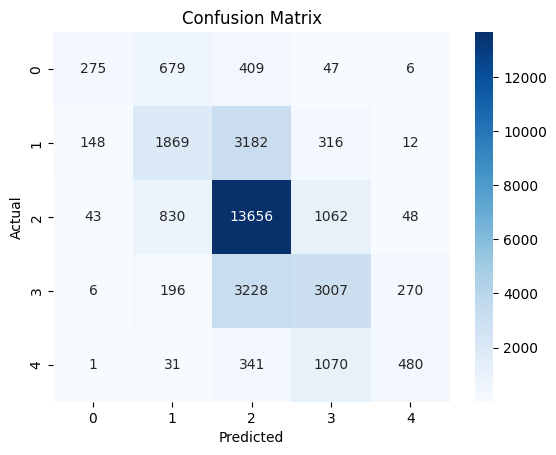

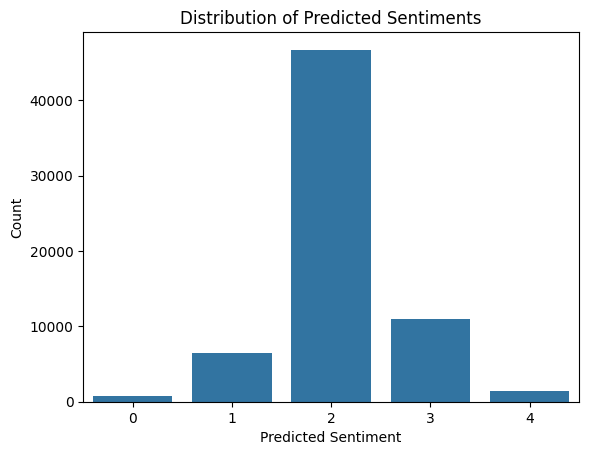

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix visualization
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Distribution of predicted sentiments in test data
sns.countplot(x='predicted_sentiment', data=test_data)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Predicted Sentiments')
plt.show()
